# Kernel Density Estimation (KDE) Plots for Model Evaluation                            
## Introduction          

Kernel Density Estimation (KDE) plots are a valuable tool for visualizing data distributions by estimating their probability density function (PDF). These plots are particularly useful in regression analysis for comparing actual and predicted values. With the deprecation of Seaborn distplot, KDE plots serve as a modern and effective method for assessing model performance.

## Why Use KDE Plots?

KDE plots are beneficial in model evaluation for the following reasons:                                   
  - They provide a smooth approximation of the data distribution.             
  - They help compare the true vs. predicted distributions effectively.               
  - Unlike histograms, KDE plots are not sensitive to bin sizes.             
  - They can highlight deviations between observed and predicted values.
                  
## Implementing KDE Plots in Python                                      
We will use Seaborn `kdeplot()` function to implement a `KDE plot`, allowing us to compare the actual and predicted distributions effectively. It provides a smooth estimate of the data distribution, making it easier to visualize differences between observed and predicted values.

### Example: Evaluating a Regression Model           
The following code demonstrates how to train a simple linear regression model, generate predictions, and visualize the actual vs. predicted distributions using KDE plots. We will use synthetic data to simulate a linear relationship with added noise, then split the data into testing and training sets, and then we will evaluate the model predictions.

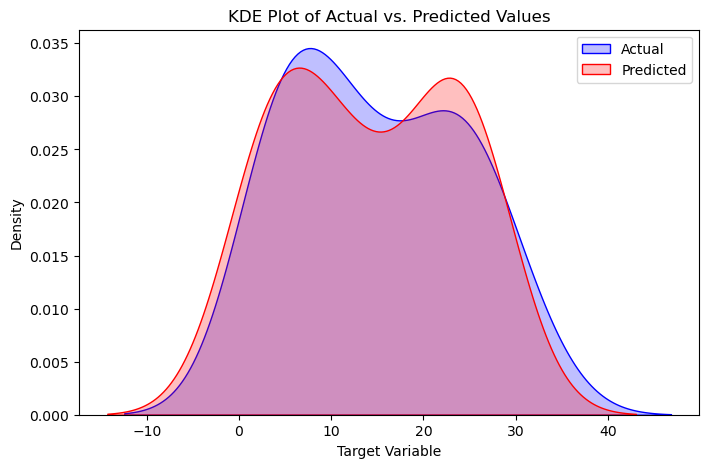

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# Generating Sample Data
np.random.seed(42)
x = np.random.rand(100) * 10
y = 3 * x + np.random.normal(0, 3, 100)  # Linear relation with noise
data = pd.DataFrame({'X': x, 'Y': y})
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['Y'], test_size=0.2, random_state=42)
# Training a Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Plotting KDE for Observed vs. Predicted Values
plt.figure(figsize=(8, 5))
sns.kdeplot(y_test, label='Actual', fill=True, color='blue')
sns.kdeplot(y_pred, label='Predicted', fill=True, color='red')
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.title('KDE Plot of Actual vs. Predicted Values')
plt.legend()
plt.show()

## Output
The resulted `Kernel Density Estimation (KDE)` plot compares the distribution of actual values (blue) and predicted values (red) from the linear regression model.

## Interpretation of the KDE Plot
**Overlap Between Distributions:** The two curves have a significant overlap, indicating that the model has captured the general distribution of the actual target values reasonably well. However, the predicted values slightly deviate from the actual values in some regions.

**Peak Differences (Mode Shifts):** The blue (actual) curve peaks slightly higher than the red curve, meaning that the actual values are more concentrated around certain values. The red (predicted) curve has a second peak, suggesting that the model may be slightly misestimating certain ranges of the target variable.

**Spread of the Distributions:** The actual values (blue) seem to have a wider spread, indicating more variation in real-world values.The predicted values (red) appear to be narrower, which suggests the model might be slightly underestimating variance (a sign of over-smoothing or bias).

**Tails of the Distributions:** The tails of the predicted values closely follow the actual values, meaning the model does not generate extreme outliers beyond what was observed in the data. If there was a significant mismatch in the tails, it could indicate that the model struggles with extreme cases.

## Conclusion
KDE plots are a powerful visualization tool for assessing the distribution of predicted values compared to actual values in regression analysis. Replacing deprecated distplot with kdeplot() ensures modern and effective visualization in model evaluation workflows.